<a href="https://colab.research.google.com/github/nilamns/K-Means_Clustering/blob/main/Decision_Tree_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# load the dataset
df = pd.read_csv("/content/drive/MyDrive/MySkills/Classification/telco_customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# set the for show max columns
pd.set_option('display.max_columns', None)

# EDA (Exploratory Data Analysis)

In [6]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
937,6400-BWQKW,Female,0,No,No,6,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,79.05,434.5,Yes
840,0727-BMPLR,Female,1,No,No,55,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,Yes,Electronic check,100.00,5509.3,Yes
101,3679-XASPY,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,19.45,19.45,No
4402,9039-RBEEE,Male,0,No,No,39,No,No phone service,DSL,Yes,Yes,No,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),48.95,1880.85,Yes
4628,1202-KKGFU,Female,0,Yes,No,12,Yes,No,DSL,Yes,No,No,Yes,No,No,Month-to-month,No,Bank transfer (automatic),54.20,690.5,No
1544,3794-NFNCH,Male,0,Yes,No,30,Yes,No,DSL,No,No,Yes,No,No,No,Month-to-month,Yes,Mailed check,50.00,1474.9,No
1428,7767-UXAGJ,Male,0,No,No,1,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,50.45,50.45,Yes
5331,5583-EJXRD,Male,0,Yes,Yes,44,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,Yes,Two year,Yes,Credit card (automatic),54.05,2375.2,No
4545,6145-NNPNO,Female,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),44.15,44.15,No
6595,5702-KVQRD,Male,0,Yes,No,71,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,82.55,5832.65,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
#data shape
df.shape

(7032, 21)

In [9]:
#Change Total Charges Data Type
df=df[df.TotalCharges!=' ']

df.TotalCharges=pd.to_numeric(df.TotalCharges)
np.dtype(df.TotalCharges)

<ipython-input-9-0180e8d759bc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.TotalCharges=pd.to_numeric(df.TotalCharges)


dtype('float64')

In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
#convert SeniorCitizen column into 1,0 values to Yes,No

df.SeniorCitizen=df.SeniorCitizen.apply(lambda x: 'Yes' if x==1 else 'No')
df.SeniorCitizen.value_counts()

No     5890
Yes    1142
Name: SeniorCitizen, dtype: int64

In [15]:
df.describe(include='all')
#df.describe(include='all').loc['unique', :]
#df.describe(include='all').iloc[1, :]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032,7032,7032,7032,7032,7032.000000,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032.000000,7032.000000,7032
unique,7032,2,2,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,7590-VHVEG,Male,No,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3549,5890,3639,4933,NaN,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,NaN,NaN,5163
mean,NaN,NaN,NaN,NaN,NaN,32.421786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.798208,2283.300441,NaN
std,NaN,NaN,NaN,NaN,NaN,24.545260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.085974,2266.771362,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.587500,401.450000,NaN
50%,NaN,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,NaN,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.862500,3794.737500,NaN


In [16]:
df.MultipleLines.value_counts()
#df.DeviceProtection.value_counts()
#df.OnlineBackup.value_counts()
#df.OnlineSecurity.value_counts()
#df.StreamingMovies.value_counts()
#df.StreamingTV.value_counts()
#df.TechSupport.value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

In [17]:
cat_cols=['MultipleLines','DeviceProtection','OnlineBackup','OnlineSecurity','StreamingMovies','StreamingTV','TechSupport','InternetService']

In [18]:
#Convert values into binary columns (Yes or No)

for col in cat_cols:
    df[col]=df[col].apply(lambda x: 'No' if 'No' in x else 'Yes')

In [19]:
#Making Plot function

def exp2(columns):
    sns.histplot(data=df, x=columns, hue='Churn')
    plt.show()

In [23]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No,Yes,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,Yes,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,Yes,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No,Yes,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Yes,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [20]:
num = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges','Churn']

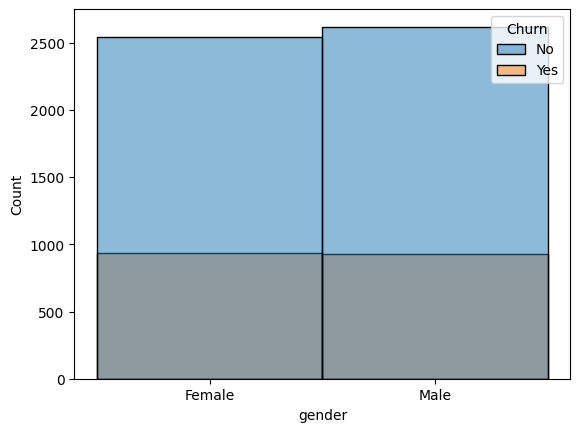

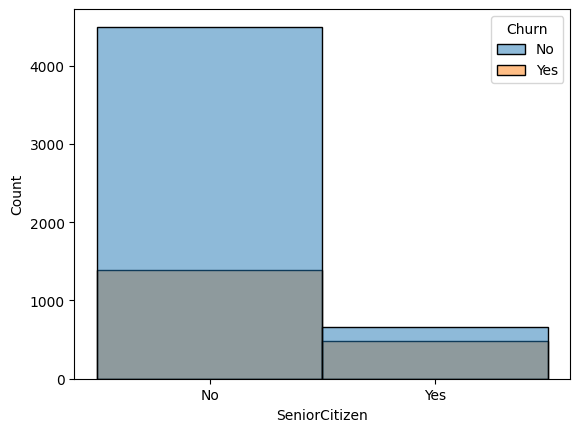

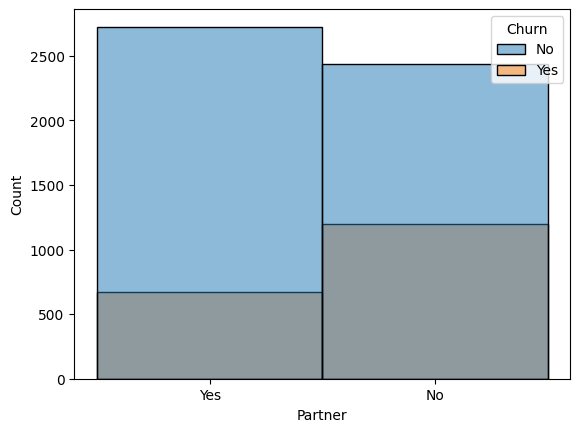

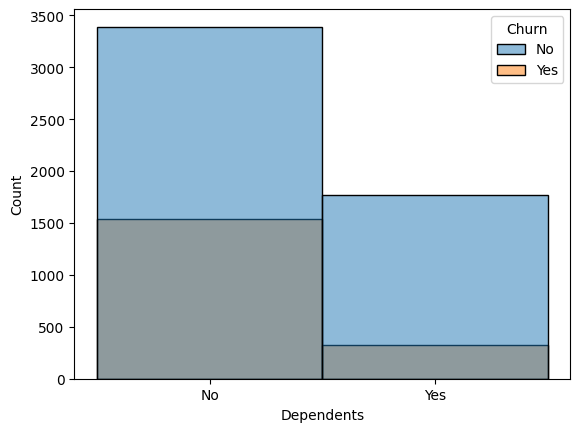

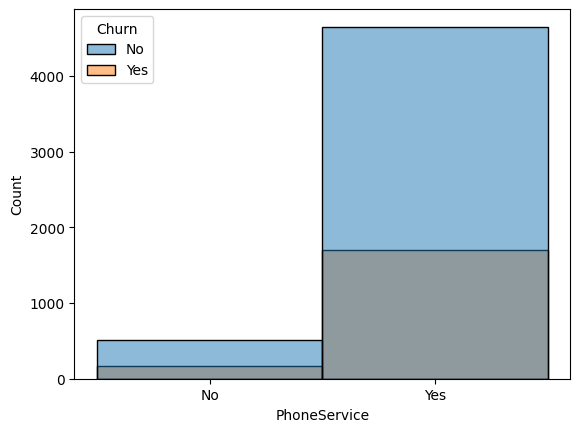

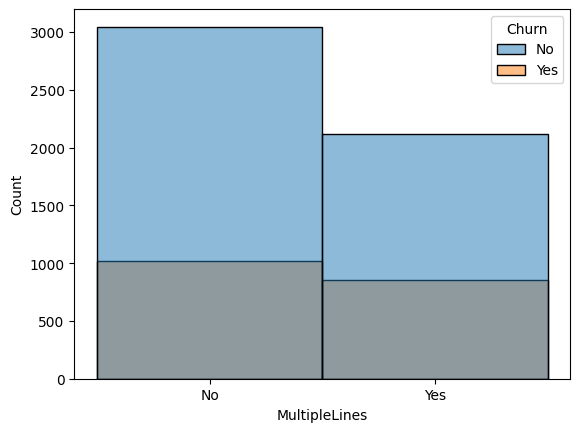

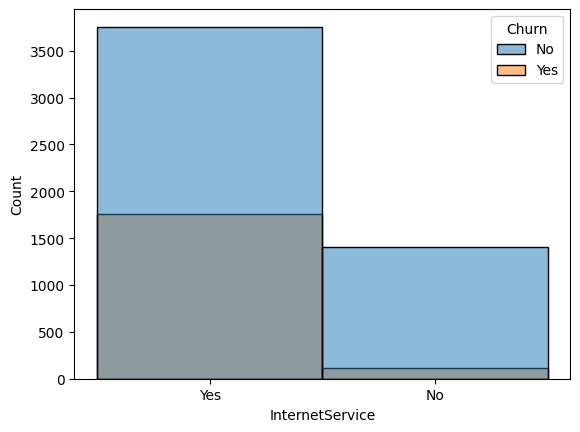

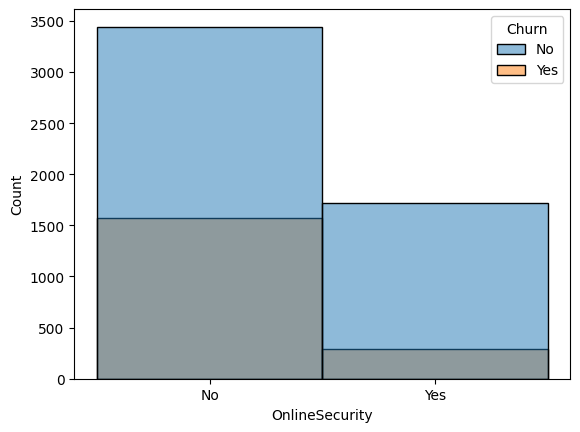

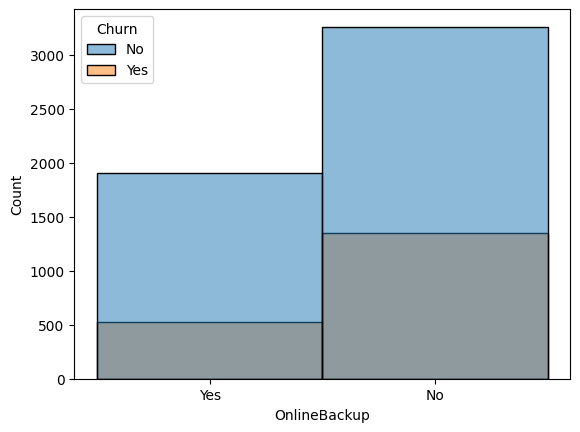

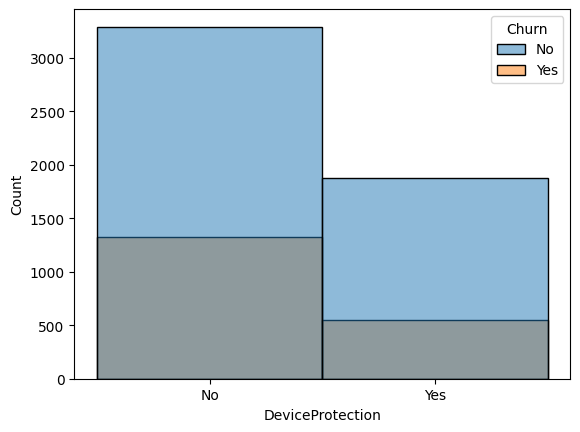

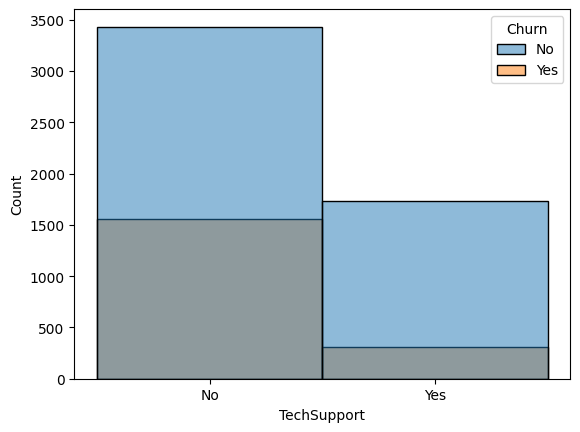

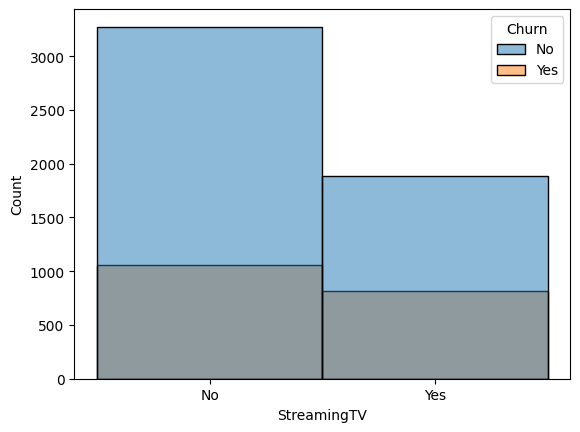

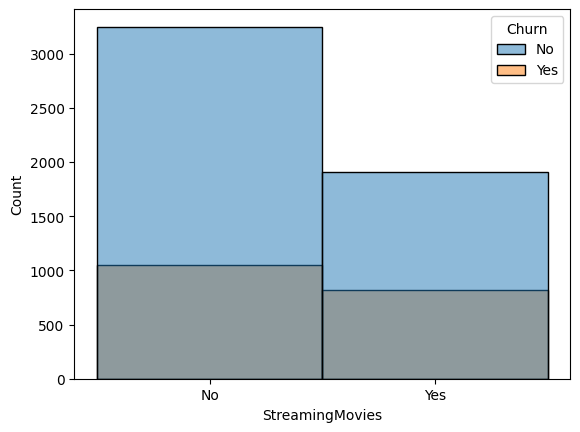

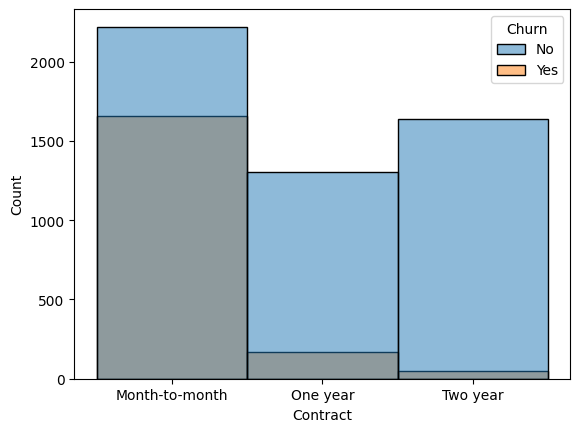

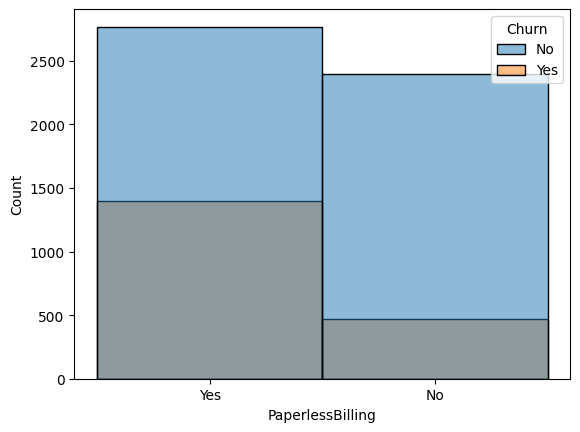

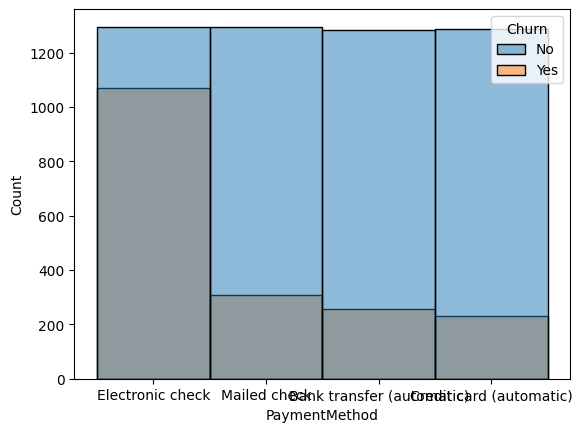

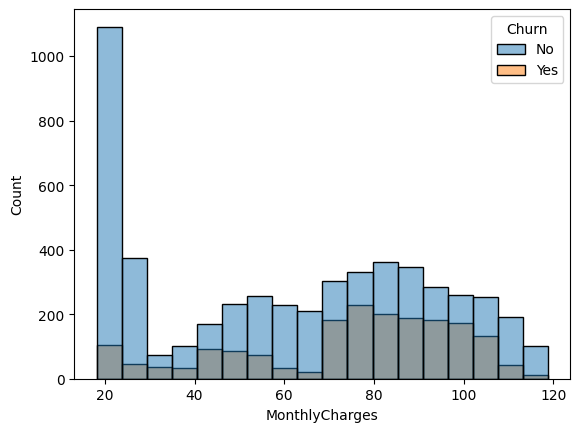

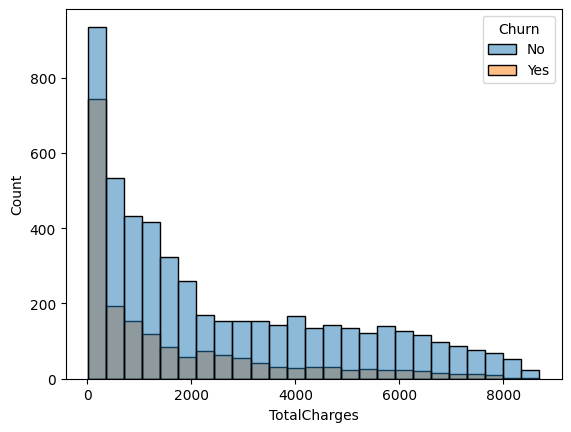

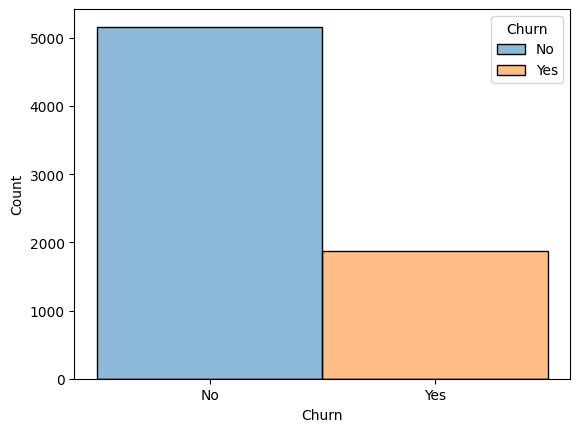

In [24]:
for feature in num:
    exp2(feature)

In [25]:
print('count of Churn')
print(df['Churn'].value_counts())
print('% of Churn')
print(df['Churn'].value_counts(normalize=True)*100)

count of Churn
No     5163
Yes    1869
Name: Churn, dtype: int64
% of Churn
No     73.421502
Yes    26.578498
Name: Churn, dtype: float64


<ipython-input-26-116bb2541990>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True);


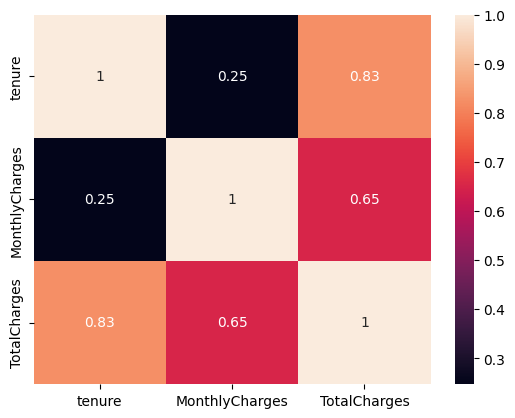

In [26]:
#Creating correlation heatmap from numerical data
sns.heatmap(df.corr(),annot=True);

#Tenure and TotalCharges, Monthly and TotalCharges are corelated and it makes sense,as totalcharges = tenure*MonthlyCharges

# Feature Engineering

In [28]:
#convert tenure/categorize customers tenure column to tenure range
def convert_tenure(tenure):
    if tenure <=12:
        return '0 - 12 months'
    elif tenure <=24:
        return '12 - 24 months'
    elif tenure <=36:
        return '24 - 36 months'
    elif tenure <=48:
        return '36 - 48 months'
    elif tenure <=60:
        return '48 - 60 months'
    else:
        return '> 60 months'

In [29]:
df['tenure']=df['tenure'].map(convert_tenure)
df['tenure'].value_counts()

0 - 12 months     2175
> 60 months       1407
12 - 24 months    1024
24 - 36 months     832
48 - 60 months     832
36 - 48 months     762
Name: tenure, dtype: int64

<Axes: xlabel='tenure'>

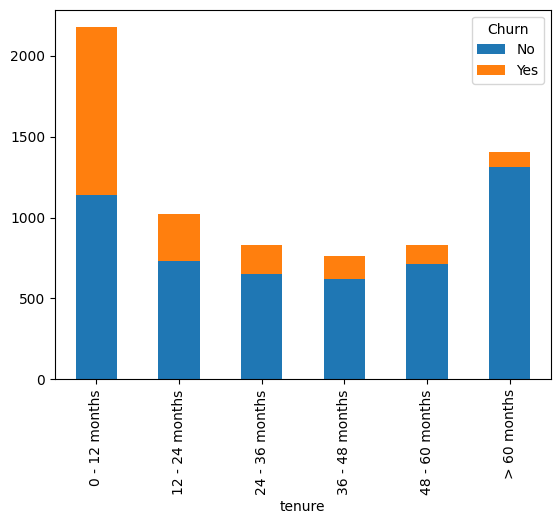

In [31]:
df.groupby(['tenure','Churn']).size().unstack().plot(kind='bar',stacked=True)

In [33]:
#Drop column
cols=df.columns
cols=cols.drop(['customerID','MonthlyCharges','TotalCharges'])
all_cat=list(cols)

In [34]:
#convert column

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

for col in all_cat_cols:
    df[col] = labelencoder.fit_transform(df[col])

df[all_cat_cols].head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,2,0
1,1,0,0,0,2,1,0,1,1,0,1,0,0,0,1,0,3,0
2,1,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,3,1
3,1,0,0,0,3,0,0,1,1,0,1,1,0,0,1,0,0,0
4,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Churn','customerID','TotalCharges'], axis=1),
    df.Churn,
    test_size= 0.2,
    random_state=0,
    stratify=df.Churn
)

# Modeling

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# instantiate the DecisionTreeClassifier model with criterion gini index
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# fit the model
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

[Text(0.5, 0.875, 'x[14] <= 0.5\nentropy = 0.835\nsamples = 5625\nvalue = [4130, 1495]'),
 Text(0.25, 0.625, 'x[17] <= 69.175\nentropy = 0.985\nsamples = 3113\nvalue = [1783, 1330]'),
 Text(0.125, 0.375, 'x[4] <= 0.5\nentropy = 0.88\nsamples = 1340\nvalue = [939, 401]'),
 Text(0.0625, 0.125, 'entropy = 0.948\nsamples = 848\nvalue = [537, 311]'),
 Text(0.1875, 0.125, 'entropy = 0.686\nsamples = 492\nvalue = [402, 90]'),
 Text(0.375, 0.375, 'x[4] <= 0.5\nentropy = 0.998\nsamples = 1773\nvalue = [844, 929]'),
 Text(0.3125, 0.125, 'entropy = 0.899\nsamples = 749\nvalue = [236, 513]'),
 Text(0.4375, 0.125, 'entropy = 0.974\nsamples = 1024\nvalue = [608, 416]'),
 Text(0.75, 0.625, 'x[17] <= 93.675\nentropy = 0.35\nsamples = 2512\nvalue = [2347, 165]'),
 Text(0.625, 0.375, 'x[14] <= 1.5\nentropy = 0.24\nsamples = 1898\nvalue = [1823, 75]'),
 Text(0.5625, 0.125, 'entropy = 0.353\nsamples = 870\nvalue = [812, 58]'),
 Text(0.6875, 0.125, 'entropy = 0.122\nsamples = 1028\nvalue = [1011, 17]'),
 T

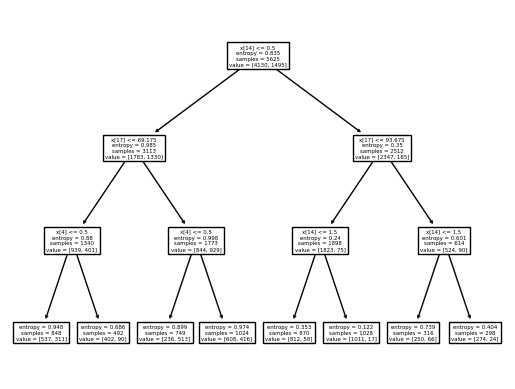

In [40]:
tree.plot_tree(clf_entropy.fit(X_train, y_train))

In [69]:
# plt.figure(figsize=(12,8))

In [73]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [74]:
y_pred=clf_entropy.predict(X_test)

In [77]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87      1223
           1       0.35      0.71      0.47       184

    accuracy                           0.79      1407
   macro avg       0.65      0.75      0.67      1407
weighted avg       0.87      0.79      0.82      1407



In [78]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)

In [79]:
cm

array([[979,  54],
       [244, 130]])

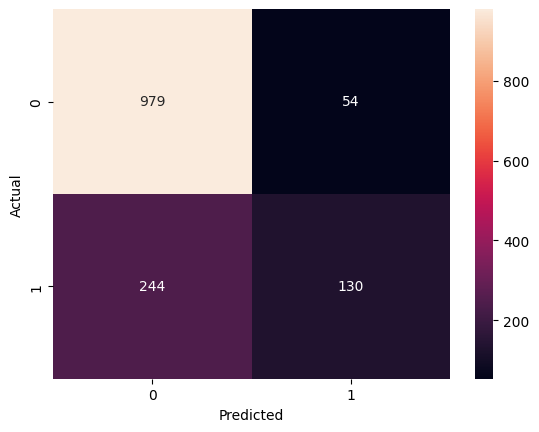

In [80]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

data = {'y_Actual':    np.array(y_test),
        'y_Predicted': np.array(y_pred)
        }

d = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(d['y_Actual'], d['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True,fmt=".0f")
plt.show()